## Залежності проекту

In [1]:
import numpy as np
import pandas as pd

In [2]:
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Ознайомлення із набором даних

In [4]:
df = pd. read_csv('/content/real-estate-with-nn-results.csv')
df.head()

,Unnamed: 0,residence,developer,description,address,district,ceilingHeight,numApartmentsTotal,year,pricePerSquareMeter,price,area,rooms,floor,minutesToCityCenter,assess,crimeRateInDistrict,predictedClass
0,0,А136 Highlight Tower,DIM,Residential complex A136 Highlight Tower is a ...,"вул. Антоновича, 136-138",Голосіївський р-н,3,324,2023.0,137800.0,7441200.0,54,1,18.0,48,52536,2317,бізнес
1,1,А136 Highlight Tower,DIM,Residential complex A136 Highlight Tower is a ...,"вул. Антоновича, 136-138",Голосіївський р-н,3,324,2023.0,137800.0,7992400.0,58,1,NaN,48,52536,2317,бізнес
2,2,А136 Highlight Tower,DIM,Residential complex A136 Highlight Tower is a ...,"вул. Антоновича, 136-138",Голосіївський р-н,3,324,2023.0,125275.0,10022000.0,80,2,7.0,48,52536,2317,бізнес
3,3,А136 Highlight Tower,DIM,Residential complex A136 Highlight Tower is a ...,"вул. Антоновича, 136-138",Голосіївський р-н,3,324,2023.0,125275.0,10147275.0,81,2,13.0,48,52536,2317,бізнес
4,4,А136 Highlight Tower,DIM,Residential complex A136 Highlight Tower is a ...,"вул. Антоновича, 136-138",Голосіївський р-н,3,324,2023.0,125275.0,10648375.0,85,2,17.0,48,52536,2317,бізнес


## Статистика

In [5]:
df.describe()

,Unnamed: 0,ceilingHeight,numApartmentsTotal,year,pricePerSquareMeter,price,area,rooms,floor,minutesToCityCenter,assess,crimeRateInDistrict
count,169.000000,169.000000,169.000000,169.000000,160.000000,1.600000e+02,169.000000,169.000000,161.000000,169.000000,169.000000,169.000000
mean,84.000000,2.443787,1731.479290,2023.393491,100752.812500,9.366031e+06,82.893491,1.852071,11.796273,91.414201,69152.650888,2720.017751
std,48.930222,0.498307,1624.999967,0.717896,69272.329403,1.257591e+07,53.039186,0.890765,6.920151,58.415538,38927.162889,600.219687
min,0.000000,2.000000,125.000000,2022.000000,34700.000000,1.232500e+06,8.000000,1.000000,2.000000,5.000000,34392.000000,2106.000000
25%,42.000000,2.000000,328.000000,2023.000000,58987.500000,3.264581e+06,53.000000,1.000000,7.000000,40.000000,47299.000000,2317.000000
50%,84.000000,2.000000,1709.000000,2023.000000,69725.000000,4.888850e+06,76.000000,2.000000,11.000000,109.000000,52536.000000,2537.000000
75%,126.000000,3.000000,2857.000000,2023.500000,116825.000000,9.024400e+06,98.000000,2.000000,14.000000,156.000000,53927.000000,2884.000000
max,168.000000,3.000000,5183.000000,2025.000000,317600.000000,7.940000e+07,556.000000,5.000000,25.500000,169.000000,136750.000000,3939.000000


In [15]:
df.shape

(169, 20)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


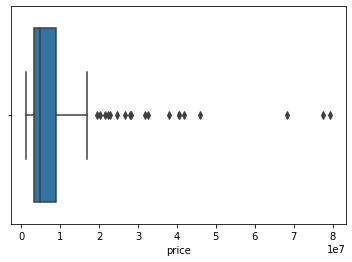

In [6]:
sns.boxplot(df['price'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


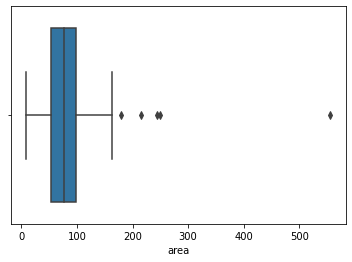

In [7]:
sns.boxplot(df['area'])
plt.show()

In [8]:
df['logprice']=np.log(df['price'])
df['logarea']=np.log(df['area'])


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


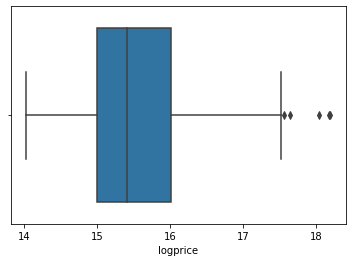

In [9]:
sns.boxplot(df['logprice'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


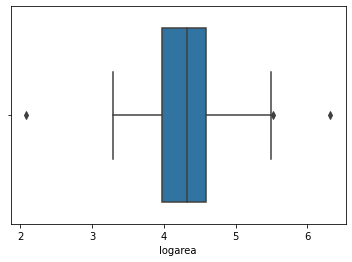

In [10]:
sns.boxplot(df['logarea'])
plt.show()

## Фільтрація набору даних від викидів

Викидами є дані що кардинально відрізняються від середніх значень що були знайдені в наборі даних.

In [11]:
q1_logprice = df['logprice'].quantile(0.25)
q3_logprice = df['logprice'].quantile(0.75)
iqr_logprice = q3_logprice - q1_logprice
lower_bound_logprice = q1_logprice - 1.5 * iqr_logprice
upper_bound_logprice = q3_logprice + 1.5 * iqr_logprice

outliers_logprice = df[(df['logprice'] < lower_bound_logprice) | (df['logprice'] > upper_bound_logprice)].index

print(outliers_logprice)


Int64Index([118, 119, 120, 121, 122], dtype='int64')


In [1]:
q1_logarea = df['logarea'].quantile(0.25)
q3_logarea = df['logarea'].quantile(0.75)
iqr_logarea = q3_logarea - q1_logarea
lower_bound_logarea = q1_logarea - 1.5 * iqr_logarea
upper_bound_logarea = q3_logarea + 1.5 * iqr_logarea

outliers_logarea = df[(df['logarea'] < lower_bound_logarea) | (df['logarea'] > upper_bound_logarea)].index

print(outliers_logarea)

NameError: name 'df' is not defined

In [13]:
df1 = df.drop([101, 118, 119, 120, 121, 122, 123])
df1.shape

(162, 20)

In [17]:
lm_HPRICE = smf.ols(formula='price ~ area', data=df1).fit()
print(lm_HPRICE.params)
lm_HPRICE.summary()

Intercept   -4.813396e+06
area         1.670893e+05
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     107.8
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.99e-19
Time:                        15:12:44   Log-Likelihood:                -2620.0
No. Observations:                 154   AIC:                             5244.
Df Residuals:                     152   BIC:                             5250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.813e+06    1.3e+06     -3.714      0.000   -7.37e+06   -2.25e+06
area        1.671e+05   1.61e+04     10.385      0.000    1.35e+05    1.99e+05
==============================================================================
Omnibus:                       29.331   Durbin-Watson:                   0.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.948
Skew:                           0.900   Prob(JB):                     3.18e-12
Kurtosis:                       5.239   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
lm_HPRICE1 = smf.ols(formula='logprice ~ area', data=df1).fit()
print(lm_HPRICE1.params)
lm_HPRICE1.summary()

Intercept    14.174875
area          0.018022
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     154.5
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           6.35e-25
Time:                        15:14:13   Log-Likelihood:                -121.77
No. Observations:                 154   AIC:                             247.5
Df Residuals:                     152   BIC:                             253.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.1749      0.117    121.390      0.000      13.944      14.406
area           0.0180      0.001     12.432      0.000       0.015       0.021
==============================================================================
Omnibus:                        0.055   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.016
Skew:                           0.022   Prob(JB):                        0.992
Kurtosis:                       2.976   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
lm_HPRICE2 = smf.ols(formula='logprice ~ logarea', data=df1).fit()
print(lm_HPRICE2.params)
lm_HPRICE2.summary()

Intercept    9.831349
logarea      1.344195
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     167.1
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.92e-26
Time:                        15:15:00   Log-Likelihood:                -118.67
No. Observations:                 154   AIC:                             241.3
Df Residuals:                     152   BIC:                             247.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8313      0.442     22.228      0.000       8.958      10.705
logarea        1.3442      0.104     12.928      0.000       1.139       1.550
==============================================================================
Omnibus:                        1.335   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                1.294
Skew:                           0.113   Prob(JB):                        0.524
Kurtosis:                       2.612   Cond. No.                         46.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='logarea', ylabel='logprice'>

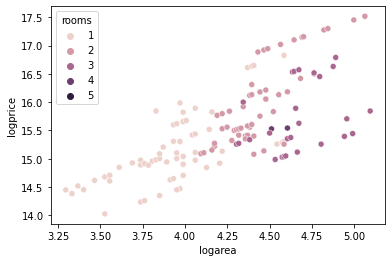

In [20]:
sns.scatterplot(data=df1, x='logarea', y='logprice', hue='rooms')

<AxesSubplot:xlabel='numApartmentsTotal', ylabel='logprice'>

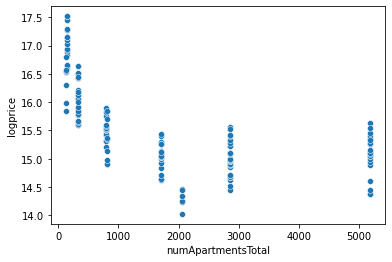

In [21]:
sns.scatterplot(data=df1, x='numApartmentsTotal', y='logprice')

<AxesSubplot:xlabel='ceilingHeight', ylabel='logprice'>

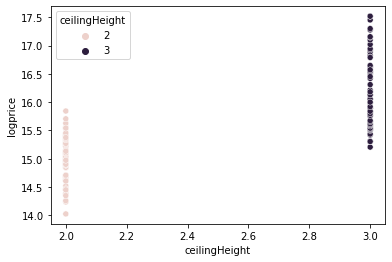

In [30]:
sns.scatterplot(data=df1, x='ceilingHeight', y='logprice', hue='ceilingHeight')

<AxesSubplot:xlabel='predictedClass', ylabel='logprice'>

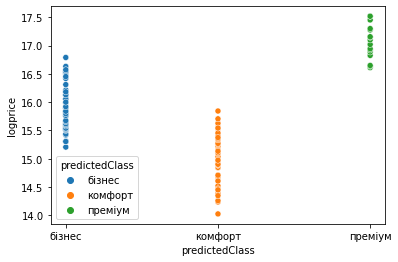

In [26]:
sns.scatterplot(data=df1, x='predictedClass', y='logprice', hue='predictedClass')

In [28]:
df1['predictedClass'] = df['predictedClass'].replace({'комфорт': 1, 'бізнес': 2, 'преміум': 3})


In [21]:
lm_HPRICE3 = smf.ols(formula='logprice ~ logarea + rooms', data=df1).fit()
print(lm_HPRICE3.params)
lm_HPRICE3.summary()

Intercept    8.364391
logarea      1.829654
rooms       -0.338253
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     103.9
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           4.19e-29
Time:                        14:21:14   Log-Likelihood:                -109.14
No. Observations:                 154   AIC:                             224.3
Df Residuals:                     151   BIC:                             233.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3644      0.531     15.745      0.000       7.315       9.414
logarea        1.8297      0.147     12.488      0.000       1.540       2.119
rooms         -0.3383      0.076     -4.459      0.000      -0.488      -0.188
==============================================================================
Omnibus:                        1.570   Durbin-Watson:                   0.239
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.533
Skew:                          -0.154   Prob(JB):                        0.465
Kurtosis:                       2.621   Cond. No.                         65.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
lm_HPRICE4 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight', data=df1).fit()
print(lm_HPRICE4.params)
lm_HPRICE4.summary()

Intercept        8.779643
logarea          1.166498
rooms           -0.132521
ceilingHeight    0.833386
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     224.3
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           3.17e-55
Time:                        14:21:14   Log-Likelihood:                -44.704
No. Observations:                 154   AIC:                             97.41
Df Residuals:                     150   BIC:                             109.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.7796      0.352     24.941      0.000       8.084       9.475
logarea           1.1665      0.108     10.832      0.000       0.954       1.379
rooms            -0.1325      0.052     -2.539      0.012      -0.236      -0.029
ceilingHeight     0.8334      0.059     14.013      0.000       0.716       0.951
==============================================================================
Omnibus:                        6.316   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                3.619
Skew:                           0.166   Prob(JB):                        0.164
Kurtosis:                       2.326   Cond. No.                         74.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
lm_HPRICE5 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal', data=df1).fit()
print(lm_HPRICE5.params)
lm_HPRICE5.summary()

Intercept             7.775261
logarea               1.297873
rooms                -0.178289
ceilingHeight         0.993451
numApartmentsTotal    0.000076
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     179.1
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           7.44e-56
Time:                        14:21:14   Log-Likelihood:                -40.308
No. Observations:                 154   AIC:                             90.62
Df Residuals:                     149   BIC:                             105.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.7753      0.483     16.106      0.000       6.821       8.729
logarea                1.2979      0.114     11.383      0.000       1.073       1.523
rooms                 -0.1783      0.053     -3.352      0.001      -0.283      -0.073
ceilingHeight          0.9935      0.079     12.526      0.000       0.837       1.150
numApartmentsTotal   7.62e-05   2.58e-05      2.959      0.004    2.53e-05       0.000
==============================================================================
Omnibus:                        3.847   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.120
Skew:                           0.236   Prob(JB):                        0.210
Kurtosis:                       2.487   Cond. No.                     4.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
lm_HPRICE5 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal', data=df1).fit()
print(lm_HPRICE5.params)
lm_HPRICE5.summary()

Intercept             7.775261
logarea               1.297873
rooms                -0.178289
ceilingHeight         0.993451
numApartmentsTotal    0.000076
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     179.1
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           7.44e-56
Time:                        14:21:14   Log-Likelihood:                -40.308
No. Observations:                 154   AIC:                             90.62
Df Residuals:                     149   BIC:                             105.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.7753      0.483     16.106      0.000       6.821       8.729
logarea                1.2979      0.114     11.383      0.000       1.073       1.523
rooms                 -0.1783      0.053     -3.352      0.001      -0.283      -0.073
ceilingHeight          0.9935      0.079     12.526      0.000       0.837       1.150
numApartmentsTotal   7.62e-05   2.58e-05      2.959      0.004    2.53e-05       0.000
==============================================================================
Omnibus:                        3.847   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.120
Skew:                           0.236   Prob(JB):                        0.210
Kurtosis:                       2.487   Cond. No.                     4.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
lm_HPRICE5 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal + floor', data=df1).fit()
print(lm_HPRICE5.params)
lm_HPRICE5.summary()

Intercept             8.008694
logarea               1.271497
rooms                -0.171390
ceilingHeight         0.964984
numApartmentsTotal    0.000068
floor                -0.004311
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     129.7
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           9.43e-51
Time:                        15:20:05   Log-Likelihood:                -40.363
No. Observations:                 146   AIC:                             92.73
Df Residuals:                     140   BIC:                             110.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.0087      0.577     13.874      0.000       6.867       9.150
logarea                1.2715      0.120     10.573      0.000       1.034       1.509
rooms                 -0.1714      0.055     -3.104      0.002      -0.281      -0.062
ceilingHeight          0.9650      0.095     10.149      0.000       0.777       1.153
numApartmentsTotal  6.769e-05   2.83e-05      2.393      0.018    1.18e-05       0.000
floor                 -0.0043      0.005     -0.881      0.380      -0.014       0.005
==============================================================================
Omnibus:                        5.523   Durbin-Watson:                   0.176
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                3.785
Skew:                           0.243   Prob(JB):                        0.151
Kurtosis:                       2.378   Cond. No.                     5.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
lm_HPRICE6 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal + floor + crimeRateInDistrict', data=df1).fit()
print(lm_HPRICE6.params)
lm_HPRICE6.summary()

Intercept              9.069973
logarea                1.552603
rooms                 -0.220848
ceilingHeight          0.525533
numApartmentsTotal     0.000013
floor                 -0.008800
crimeRateInDistrict   -0.000344
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     140.2
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.04e-56
Time:                        15:22:07   Log-Likelihood:                -23.962
No. Observations:                 146   AIC:                             61.92
Df Residuals:                     139   BIC:                             82.81
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.0700      0.548     16.552      0.000       7.987      10.153
logarea                 1.5526      0.118     13.172      0.000       1.320       1.786
rooms                  -0.2208      0.050     -4.397      0.000      -0.320      -0.122
ceilingHeight           0.5255      0.113      4.647      0.000       0.302       0.749
numApartmentsTotal   1.323e-05    2.7e-05      0.490      0.625   -4.01e-05    6.66e-05
floor                  -0.0088      0.004     -1.975      0.050      -0.018    1.14e-05
crimeRateInDistrict    -0.0003   5.82e-05     -5.917      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        0.785   Durbin-Watson:                   0.274
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.491
Skew:                           0.124   Prob(JB):                        0.782
Kurtosis:                       3.137   Cond. No.                     8.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
lm_HPRICE7 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal + floor + crimeRateInDistrict + predictedClass', data=df1).fit()
print(lm_HPRICE7.params)
lm_HPRICE7.summary()

Intercept              11.400467
logarea                 1.014366
rooms                  -0.024582
ceilingHeight          -0.339800
numApartmentsTotal      0.000017
floor                  -0.001805
crimeRateInDistrict    -0.000247
predictedClass          0.877250
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     309.7
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           4.49e-81
Time:                        15:34:38   Log-Likelihood:                 39.004
No. Observations:                 146   AIC:                            -62.01
Df Residuals:                     138   BIC:                            -38.14
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.4005      0.395     28.827      0.000      10.618      12.182
logarea                 1.0144      0.086     11.760      0.000       0.844       1.185
rooms                  -0.0246      0.036     -0.688      0.493      -0.095       0.046
ceilingHeight          -0.3398      0.097     -3.505      0.001      -0.532      -0.148
numApartmentsTotal   1.747e-05   1.76e-05      0.992      0.323   -1.73e-05    5.23e-05
floor                  -0.0018      0.003     -0.612      0.542      -0.008       0.004
crimeRateInDistrict    -0.0002   3.86e-05     -6.388      0.000      -0.000      -0.000
predictedClass          0.8773      0.064     13.746      0.000       0.751       1.003
==============================================================================
Omnibus:                       31.445   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.011
Skew:                          -1.102   Prob(JB):                     3.76e-11
Kurtosis:                       4.742   Cond. No.                     9.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
lm_HPRICE8 = smf.ols(formula='logprice ~ logarea + predictedClass', data=df1).fit()
print(lm_HPRICE8.params)
lm_HPRICE8.summary()

Intercept         10.947862
logarea            0.798287
predictedClass     0.773272
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     782.6
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.00e-80
Time:                        15:39:34   Log-Likelihood:                 11.376
No. Observations:                 154   AIC:                            -16.75
Df Residuals:                     151   BIC:                            -7.642
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.9479      0.196     55.979      0.000      10.561      11.334
logarea            0.7983      0.050     16.104      0.000       0.700       0.896
predictedClass     0.7733      0.030     25.815      0.000       0.714       0.832
==============================================================================
Omnibus:                       18.458   Durbin-Watson:                   0.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.173
Skew:                          -0.597   Prob(JB):                      0.00138
Kurtosis:                       2.207   Cond. No.                         51.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""